In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
in_dir = 'ATAC_results/'
coef_df = pd.read_csv(in_dir+'coefs.txt', sep='\t')
coef_df = coef_df.set_index('Unnamed: 0')

In [3]:
coef_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
central_cov_ER_neg_0_5_FC,0.031899,0.402069,0.323984,0.000384,0.335625,0.005836,0.320706,0.003877,0.412003,0.080472,...,0.045017,0.352612,0.030994,0.110804,0.154298,0.103294,0.124161,0.094073,0.381940,0.260019
central_cov_ER_neg_heme_0_5_FC,0.007120,-0.372874,0.127686,0.000267,-0.106428,0.004312,0.108098,0.002910,0.195488,-0.052938,...,0.030443,-0.197232,0.018416,0.583827,0.103756,0.078405,0.047516,0.031542,-0.032276,0.026152
central_cov_ER_pos_0_5_FC,-0.040540,0.047566,-0.296380,-0.000428,-0.194012,-0.004622,-0.206504,-0.004455,-0.305822,-0.338805,...,-0.019994,-0.308601,-0.031746,-0.189462,-0.104370,0.162267,-0.134151,-0.096612,0.291305,-0.197940
central_cov_ER_pos_heme_0_5_FC,-0.034628,0.545642,-0.070361,-0.000510,-0.291144,-0.006571,-0.012893,-0.004740,-0.191700,-0.162068,...,-0.032174,-0.005280,-0.025180,-0.263413,-0.200563,-0.493367,-0.021436,-0.145113,0.015407,-0.099331
fft_10_magnitude_ER_neg_0_5_FC,-0.004739,-0.430285,-0.330860,-0.000120,-0.451930,-0.002620,-0.212540,-0.000936,-0.321138,-0.197253,...,-0.019078,-0.328319,-0.015343,-0.482333,-0.123051,-0.617842,-0.270354,-0.102586,-0.215110,-0.323966


In [4]:
features = coef_df.index
features = np.sort(features)
features = pd.Series(features)

#sort into desired order
features = features[features.str.contains('ER_pos_0')].append(features[features.str.contains('ER_pos_heme')]).append(features[features.str.contains('ER_neg_0')]).append(features[features.str.contains('ER_neg_heme')])
features = features[features.str.contains('central_cov')].append(features[features.str.contains('mean_cov')]).append(features[features.str.contains('fft')]).values
features = np.flip(features)

In [5]:
# iterations = coef_df.columns.drop(['mean_coef','abs_coef'])
iterations = [str(m) for m in np.arange(1000)]

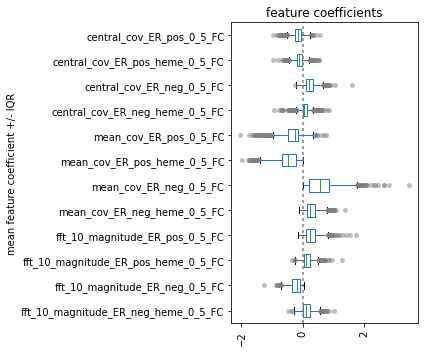

In [6]:
#plot the coefficients
fig,ax = plt.subplots(figsize = (6,5))

flierprops = {'marker':'.','markersize':10,'alpha':.5,'markerfacecolor':'grey','markeredgecolor':'none'}
coef_df[iterations].loc[features].T.plot.box(ax = ax,  vert = False, flierprops = flierprops)
ax.set_title('feature coefficients')

ax.tick_params(axis = 'x', labelrotation=90)
ax.axvline(x=0, color = 'grey', dashes = [2,2])

ax.set_ylabel('mean feature coefficient +/- IQR')

fig.tight_layout()
fig.savefig(in_dir+'coefficients2.pdf')
plt.show()